## 美国职业棒球数据分析U报告 1985-2015

In [127]:
START_YEAR = 1985
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

读取球队数据

In [128]:

origin_df = pd.read_csv('./baseballdatabank-master/core/Teams.csv')
print origin_df.columns
years_df = origin_df.set_index('yearID')
teams_df = origin_df.set_index('teamID')

Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro'],
      dtype='object')


读取薪资数据

In [129]:
salaries_df = pd.read_csv('./baseballdatabank-master/core/Salaries.csv')
salaries_df = salaries_df[salaries_df['yearID']>=START_YEAR]
print salaries_df


       yearID teamID lgID   playerID    salary
0        1985    ATL   NL  barkele01    870000
1        1985    ATL   NL  bedrost01    550000
2        1985    ATL   NL  benedbr01    545000
3        1985    ATL   NL   campri01    633333
4        1985    ATL   NL  ceronri01    625000
5        1985    ATL   NL  chambch01    800000
6        1985    ATL   NL  dedmoje01    150000
7        1985    ATL   NL  forstte01    483333
8        1985    ATL   NL  garbege01    772000
9        1985    ATL   NL  harpete01    250000
10       1985    ATL   NL  hornebo01   1500000
11       1985    ATL   NL  hubbagl01    455000
12       1985    ATL   NL  mahleri01    407500
13       1985    ATL   NL  mcmurcr01    275000
14       1985    ATL   NL  mumphje01    775000
15       1985    ATL   NL  murphda05   1625000
16       1985    ATL   NL  oberkke01    616667
17       1985    ATL   NL  perezpa01    450000
18       1985    ATL   NL  perryge01    120000
19       1985    ATL   NL  ramirra01    750000
20       1985

#### 计算球队数据的相关性

In [130]:
grp_salaries = salaries_df[['yearID', 'teamID', 'salary']].groupby(['yearID', 'teamID'])

In [131]:
print grp_salaries.describe()

              salary                                                    \
               count          mean           std       min         25%   
yearID teamID                                                            
1985   ATL      22.0  6.730455e+05  3.970351e+05  120000.0   451250.00   
       BAL      22.0  5.254869e+05  3.189283e+05   60000.0   390625.00   
       BOS      25.0  4.359024e+05  2.985073e+05  115000.0   177500.00   
       CAL      28.0  5.152819e+05  3.052799e+05   60000.0   321666.75   
       CHA      21.0  4.688656e+05  3.440961e+05   60000.0   195000.00   
       CHN      22.0  5.774053e+05  3.190828e+05  200000.0   335000.25   
       CIN      22.0  3.799962e+05  3.227896e+05   60000.0   126875.00   
       CLE      20.0  3.275833e+05  2.290844e+05  110000.0   197500.00   
       DET      20.0  5.174072e+05  2.863597e+05   76000.0   250000.00   
       HOU      20.0  4.996525e+05  3.119774e+05   60000.0   294166.75   
       KCA      22.0  4.236900e+05  3.

In [132]:
#computed_grp_salaries_df = grp_salaries['salary'].agg([np.sum, np.std, np.mean, np.min, np.max]).reset_index()
computed_grp_salaries_df = grp_salaries['salary'].agg([pd.Series.count, np.sum, np.std, np.mean, np.max]).reset_index()
print computed_grp_salaries_df

     yearID teamID  count        sum           std          mean      amax
0      1985    ATL     22   14807000  3.970351e+05  6.730455e+05   1625000
1      1985    BAL     22   11560712  3.189283e+05  5.254869e+05   1472819
2      1985    BOS     25   10897560  2.985073e+05  4.359024e+05   1075000
3      1985    CAL     28   14427894  3.052799e+05  5.152819e+05   1100000
4      1985    CHA     21    9846178  3.440961e+05  4.688656e+05   1242333
5      1985    CHN     22   12702917  3.190828e+05  5.774053e+05   1450000
6      1985    CIN     22    8359917  3.227896e+05  3.799962e+05   1071429
7      1985    CLE     20    6551666  2.290844e+05  3.275833e+05   1100000
8      1985    DET     20   10348143  2.863597e+05  5.174072e+05   1083333
9      1985    HOU     20    9993051  3.119774e+05  4.996525e+05   1350000
10     1985    KCA     22    9321179  3.009853e+05  4.236900e+05   1000000
11     1985    LAN     23   10967917  3.275862e+05  4.768660e+05   1270000
12     1985    MIN     19

In [133]:
team_with_salaries_df = pd.merge(computed_grp_salaries_df, origin_df[['yearID', 'teamID', 'Rank', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'Ghome', 'attendance']], how='inner', on=['yearID', 'teamID']).set_index(['yearID', 'teamID'])

调整球队排名的计算。把季后赛成绩和常规赛成绩统一到一个排名字段ARank，后面以此为依据计算和排名相关的变量

In [134]:
def rank_adjust(row):
    rank = row['Rank'] + 3
    if row['WSWin'] == 'Y':
        rank -= 3
    elif row['LgWin'] == 'Y':
        rank -= 2
    return rank

team_with_salaries_df['ARank'] = team_with_salaries_df.apply(lambda row: rank_adjust(row), axis=1)
print team_with_salaries_df

               count        sum           std          mean      amax  Rank  \
yearID teamID                                                                 
1985   ATL        22   14807000  3.970351e+05  6.730455e+05   1625000     5   
       BAL        22   11560712  3.189283e+05  5.254869e+05   1472819     4   
       BOS        25   10897560  2.985073e+05  4.359024e+05   1075000     5   
       CAL        28   14427894  3.052799e+05  5.152819e+05   1100000     2   
       CHA        21    9846178  3.440961e+05  4.688656e+05   1242333     3   
       CHN        22   12702917  3.190828e+05  5.774053e+05   1450000     4   
       CIN        22    8359917  3.227896e+05  3.799962e+05   1071429     2   
       CLE        20    6551666  2.290844e+05  3.275833e+05   1100000     7   
       DET        20   10348143  2.863597e+05  5.174072e+05   1083333     3   
       HOU        20    9993051  3.119774e+05  4.996525e+05   1350000     3   
       KCA        22    9321179  3.009853e+05  4.236

In [135]:
print team_with_salaries_df.loc[2014]

        count        sum           std          mean      amax  Rank DivWin  \
teamID                                                                        
ARI        26   97861500  3.823383e+06  3.763904e+06  11000000     5      N   
ATL        24   97609000  4.779448e+06  4.067042e+06  14250000     2      N   
BAL        28  103416000  4.349065e+06  3.693429e+06  15000000     1      Y   
BOS        31  139019929  4.887357e+06  4.484514e+06  16000000     5      N   
CHA        24   81830500  4.150391e+06  3.409604e+06  15000000     4      N   
CHN        27   65522500  2.446508e+06  2.426759e+06  11000000     5      N   
CIN        28  108217500  3.914747e+06  3.864911e+06  12000000     4      N   
CLE        26   82151899  4.192258e+06  3.159688e+06  15000000     3      N   
COL        30   95403500  4.090896e+06  3.180117e+06  16000000     4      N   
DET        23  152855500  7.276494e+06  6.645891e+06  22000000     1      Y   
HOU        20   35116300  2.888056e+06  1.755815e+06

In [136]:
print 'arank corr team salaries:', team_with_salaries_df['ARank'].corr(team_with_salaries_df['sum'])

arank corr team salaries: -0.24897004885052806


In [137]:
print 'arank corr team Ghome', team_with_salaries_df['ARank'].corr(team_with_salaries_df['Ghome'])

arank corr team Ghome 0.018350805778188012


In [138]:
print 'arank corr team home attendances', team_with_salaries_df['ARank'].corr(team_with_salaries_df['attendance'])

arank corr team home attendances -0.4336584805405877


In [139]:
print 'salaries corr team home attendances', team_with_salaries_df['sum'].corr(team_with_salaries_df['attendance'])

salaries corr team home attendances 0.5712660270644402


In [140]:
print 'arank corr team players:', team_with_salaries_df['ARank'].corr(team_with_salaries_df['count'])

arank corr team players: 0.015906237476913093


In [141]:
def rolling_years_corr(rolling_size, team_with_salaries_df):
    team_with_salaries_df_sal = team_with_salaries_df['sum']
    team_with_salaries_df[str(rolling_size)+'ysal_avg'] = team_with_salaries_df_sal.rolling(rolling_size).mean()
    team_with_salaries_df_arank = team_with_salaries_df['ARank']
    team_with_salaries_df[str(rolling_size)+'yarank_avg'] = team_with_salaries_df_arank.rolling(rolling_size).mean()

In [142]:
rolling_years_corr(3, team_with_salaries_df)
rolling_years_corr(5, team_with_salaries_df)
print team_with_salaries_df.loc[2014]

        count        sum           std          mean      amax  Rank DivWin  \
teamID                                                                        
ARI        26   97861500  3.823383e+06  3.763904e+06  11000000     5      N   
ATL        24   97609000  4.779448e+06  4.067042e+06  14250000     2      N   
BAL        28  103416000  4.349065e+06  3.693429e+06  15000000     1      Y   
BOS        31  139019929  4.887357e+06  4.484514e+06  16000000     5      N   
CHA        24   81830500  4.150391e+06  3.409604e+06  15000000     4      N   
CHN        27   65522500  2.446508e+06  2.426759e+06  11000000     5      N   
CIN        28  108217500  3.914747e+06  3.864911e+06  12000000     4      N   
CLE        26   82151899  4.192258e+06  3.159688e+06  15000000     3      N   
COL        30   95403500  4.090896e+06  3.180117e+06  16000000     4      N   
DET        23  152855500  7.276494e+06  6.645891e+06  22000000     1      Y   
HOU        20   35116300  2.888056e+06  1.755815e+06

In [143]:
print 'arank corr team Ghome rolling 5 years', team_with_salaries_df['5yarank_avg'].corr(team_with_salaries_df['5ysal_avg'])

arank corr team Ghome rolling 5 years -0.3215991285050088


In [144]:
print 'arank corr team Ghome rolling 3 years', team_with_salaries_df['3yarank_avg'].corr(team_with_salaries_df['3ysal_avg'])

arank corr team Ghome rolling 3 years -0.28920052289936754


绘制图形

把数据拆分成10年的粒度

In [146]:
def get_index_min_max(df, index_label):
    index = df.index.get_level_values(index_label)
    if index.dtype.kind != 'i':
        raise 'index isnot ingeter type!'
    min_val = index.min()
    max_val = index.max()
    return min_val, max_val
    
def divide_by_index_size(size, index_label, df):
    min_val, max_val = get_index_min_max(df, index_label)
    df_list = []
    for i in range(min_val, max_val, size):
        df_list.append(df.loc[pd.IndexSlice[i:i+size]])
    print 'df list ', len(df_list)
    return df_list

team_with_salaries_df_10years = divide_by_index_size(10, 'yearID', team_with_salaries_df)
team_with_salaries_df_10years.reverse()

df list  3


绘制MLB从1985年开始的球队薪资变化stack图形

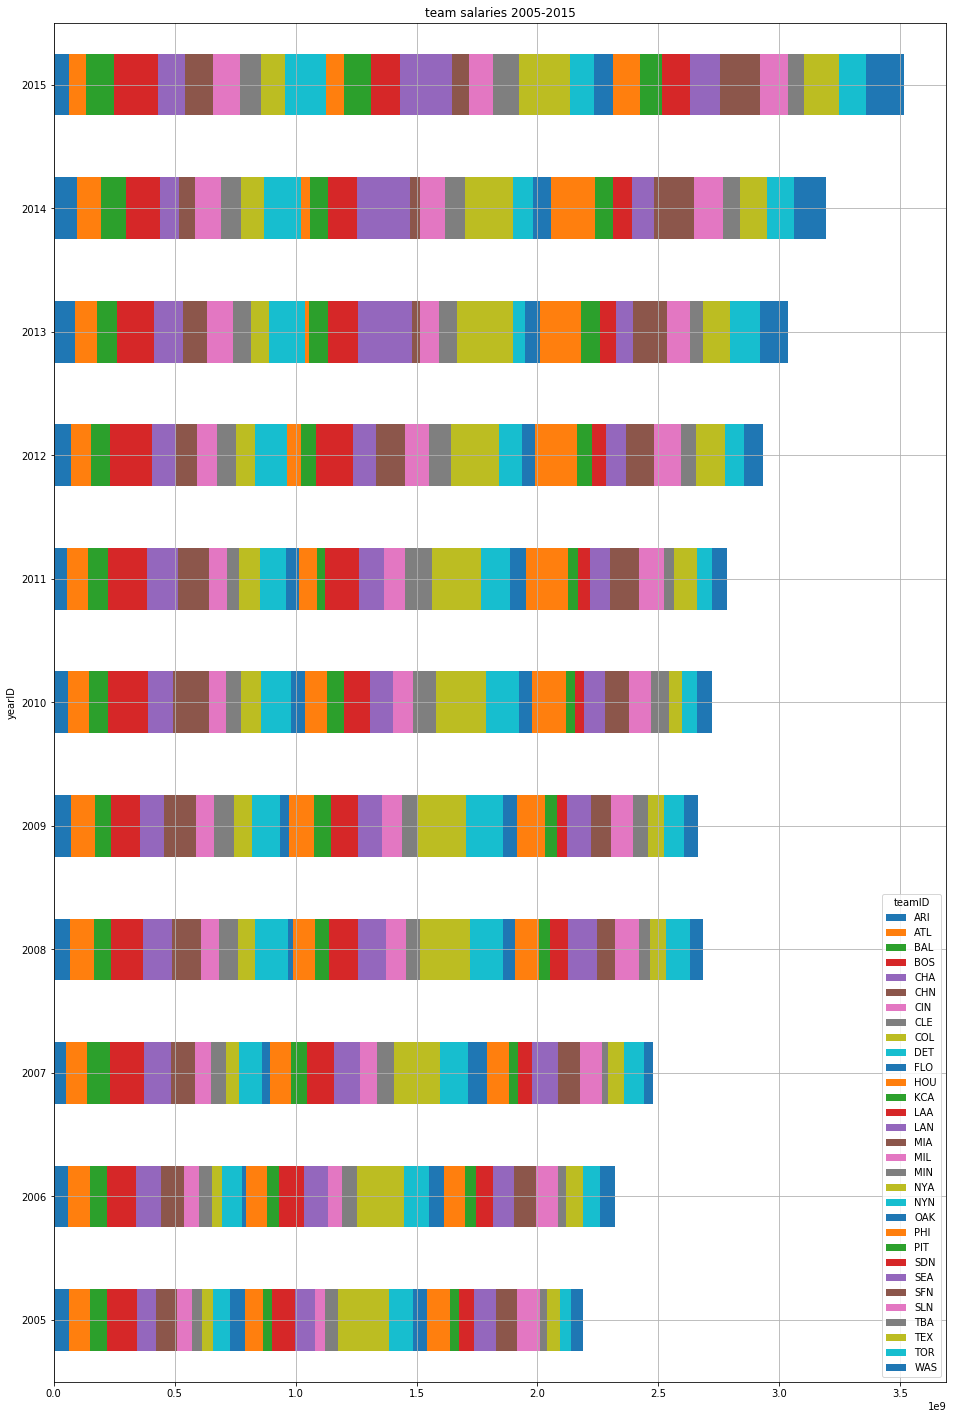

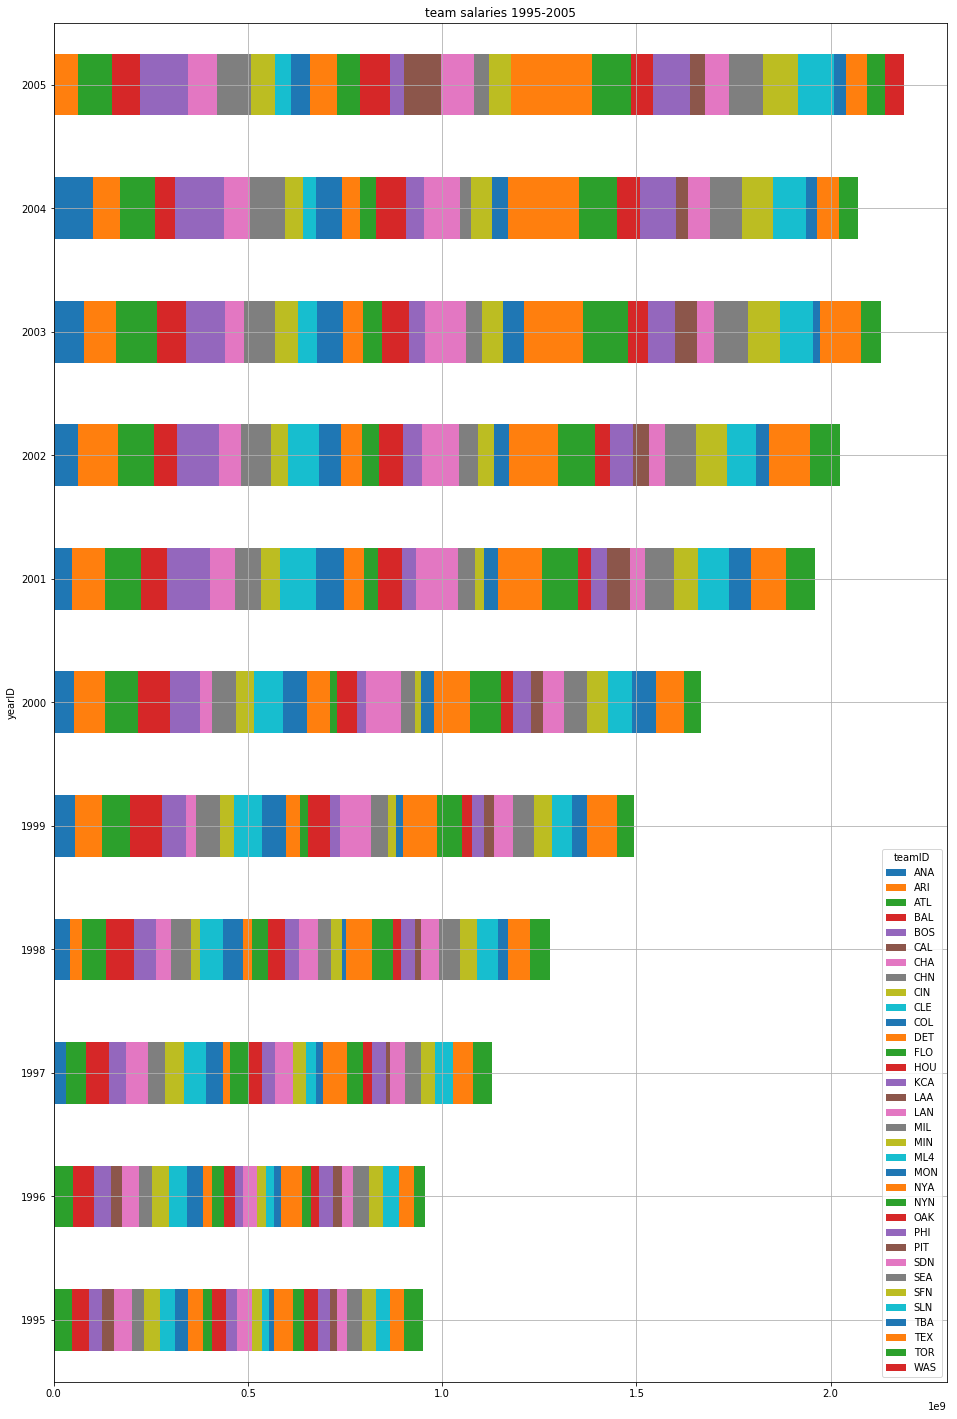

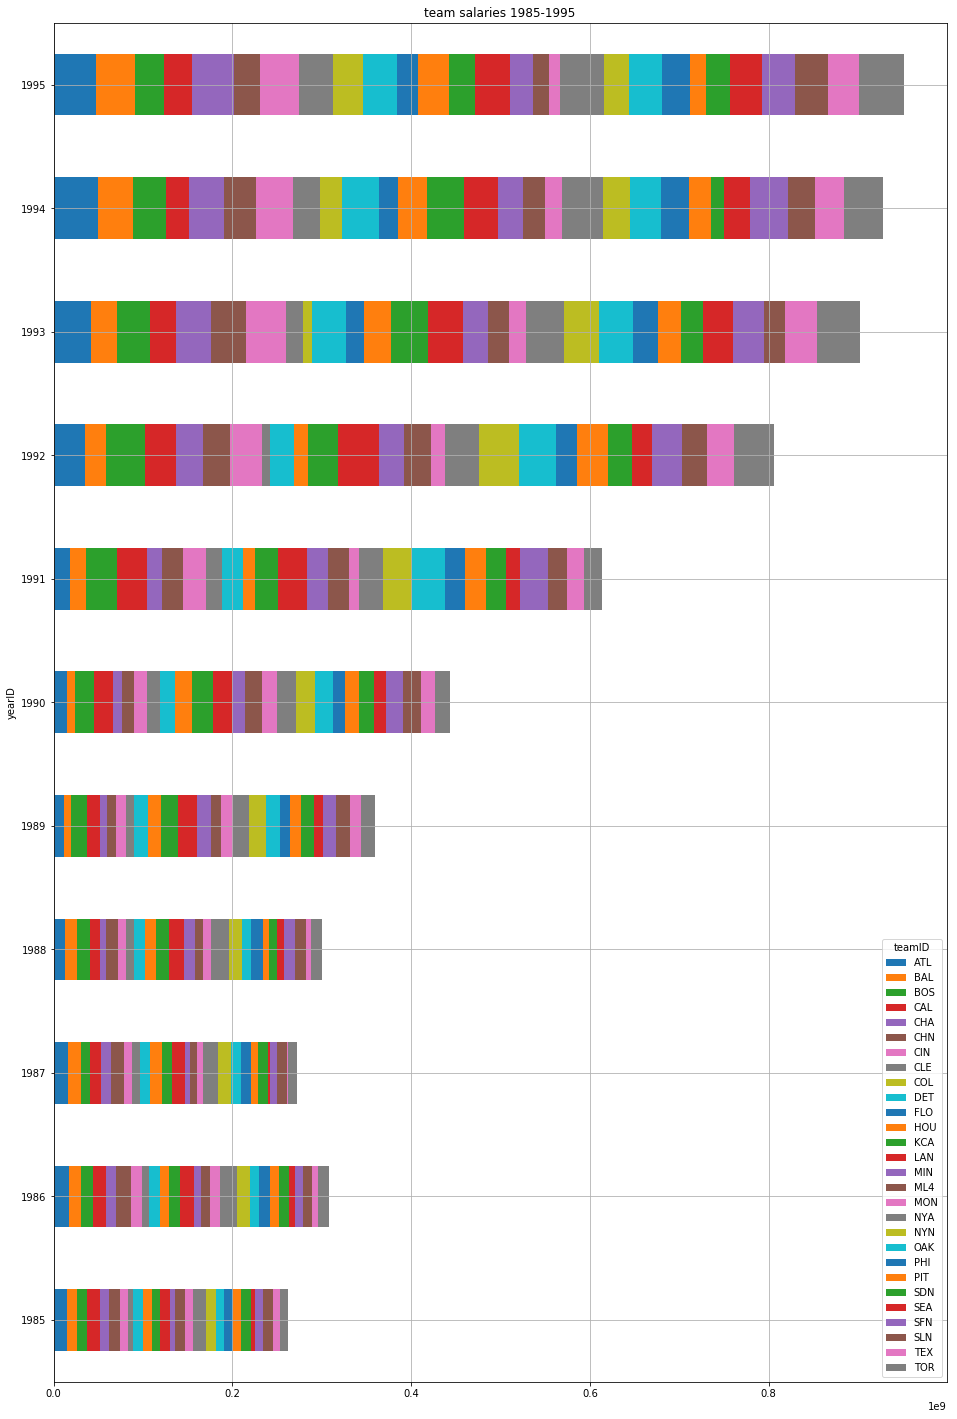

In [155]:
def draw_barh_with_team_salaries(df, title):
    min_year, max_year = get_index_min_max(df, 'yearID')
    title = '%s %d-%d'%(title, min_year, max_year)
    salaries_df = df[['sum']].reset_index()
    draw_df = salaries_df.pivot(index='yearID', columns='teamID', values='sum')
    draw_df.plot.barh(figsize=(16, 25), grid=True, stacked=True, title=title)
    
for df in team_with_salaries_df_10years:
    draw_barh_with_team_salaries(df, 'team salaries')

按年绘制球队总薪资和赛季排名的scatter

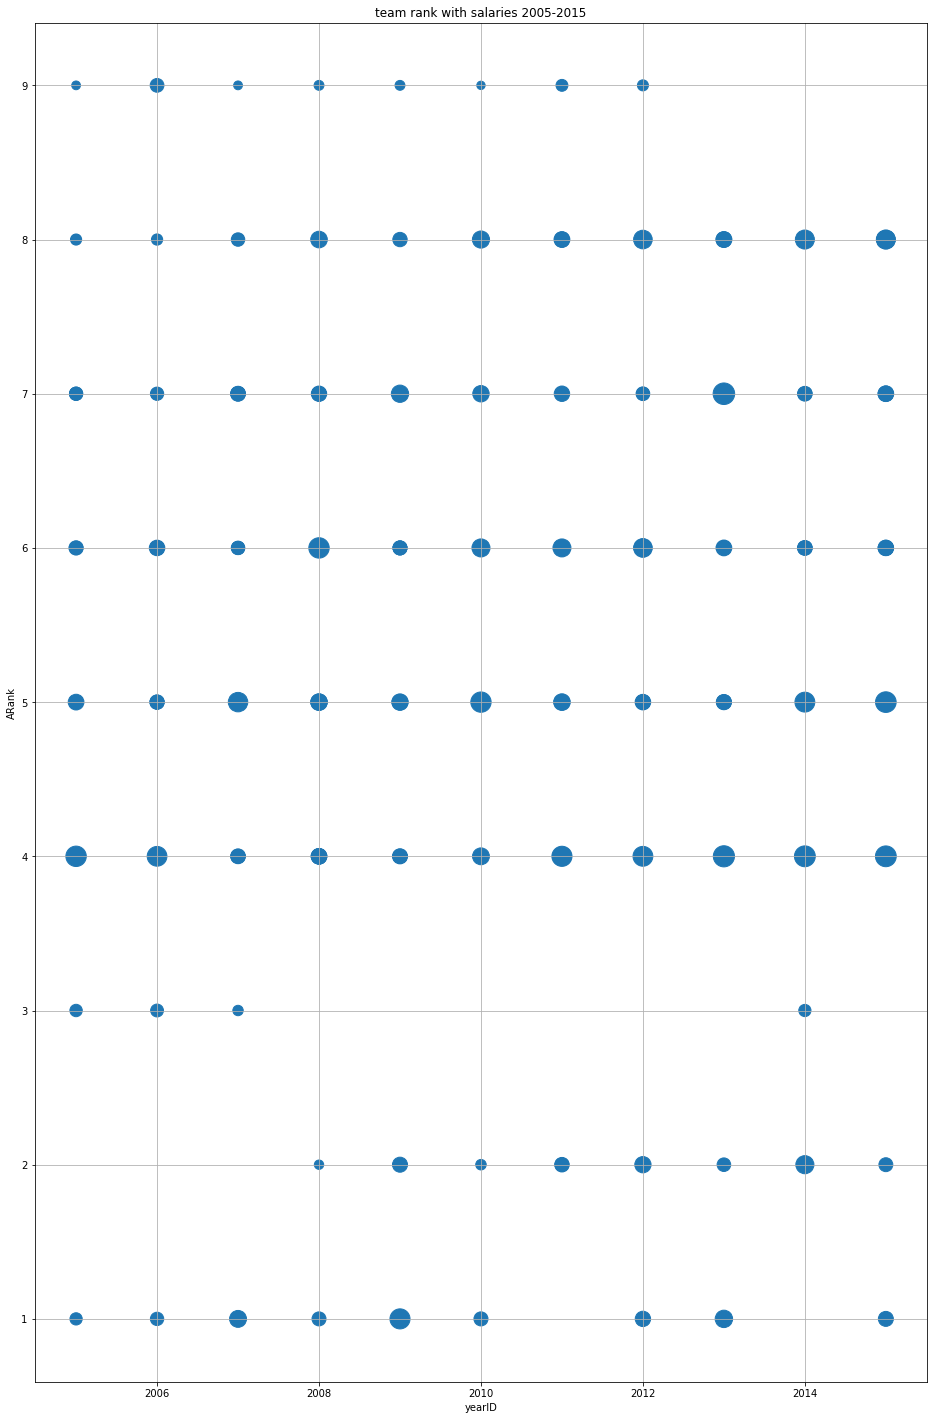

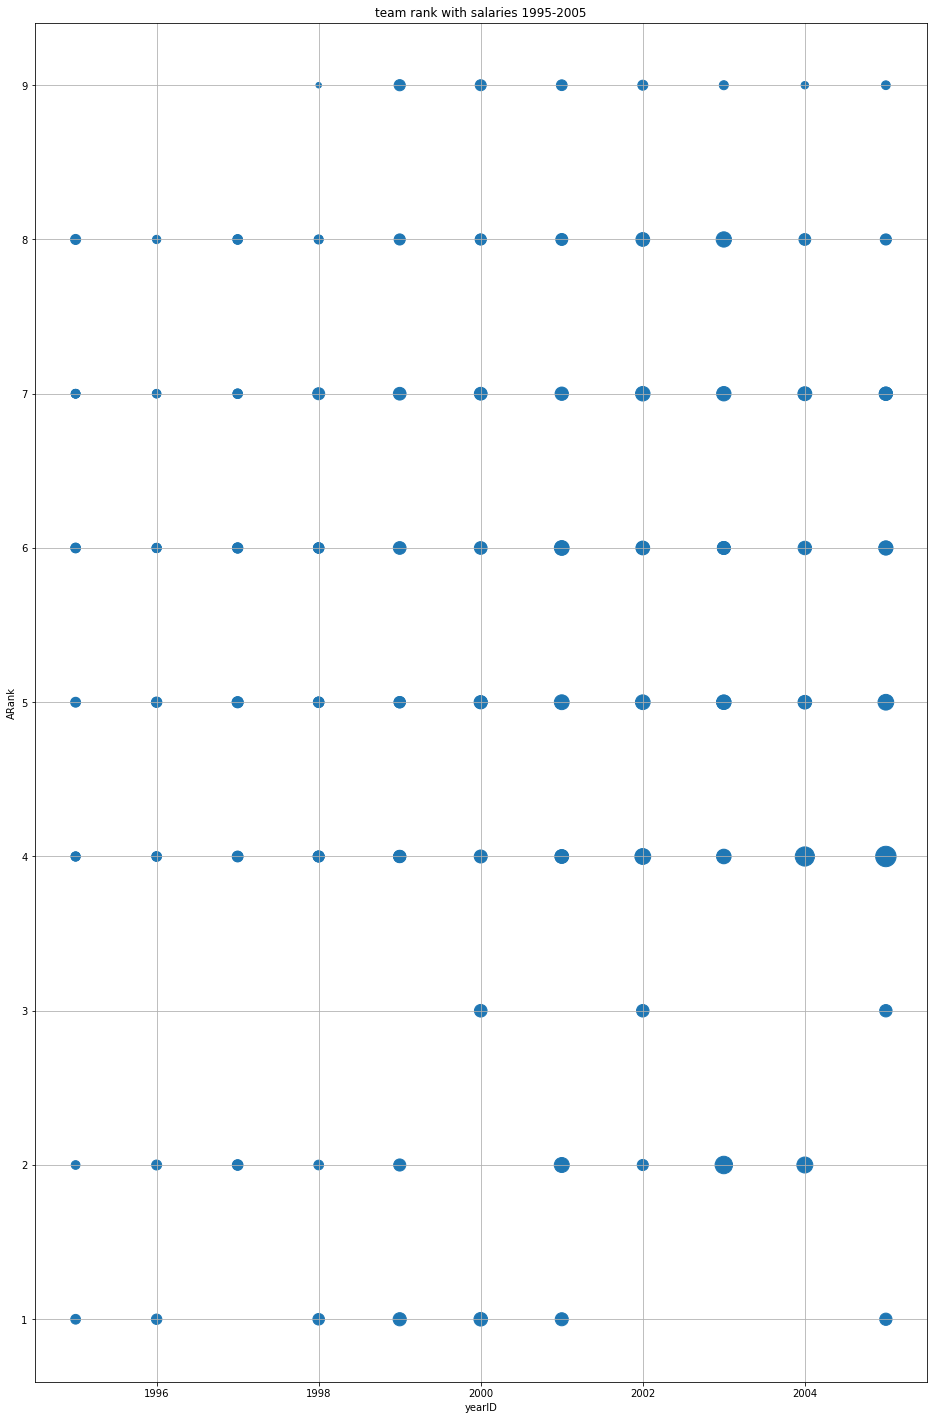

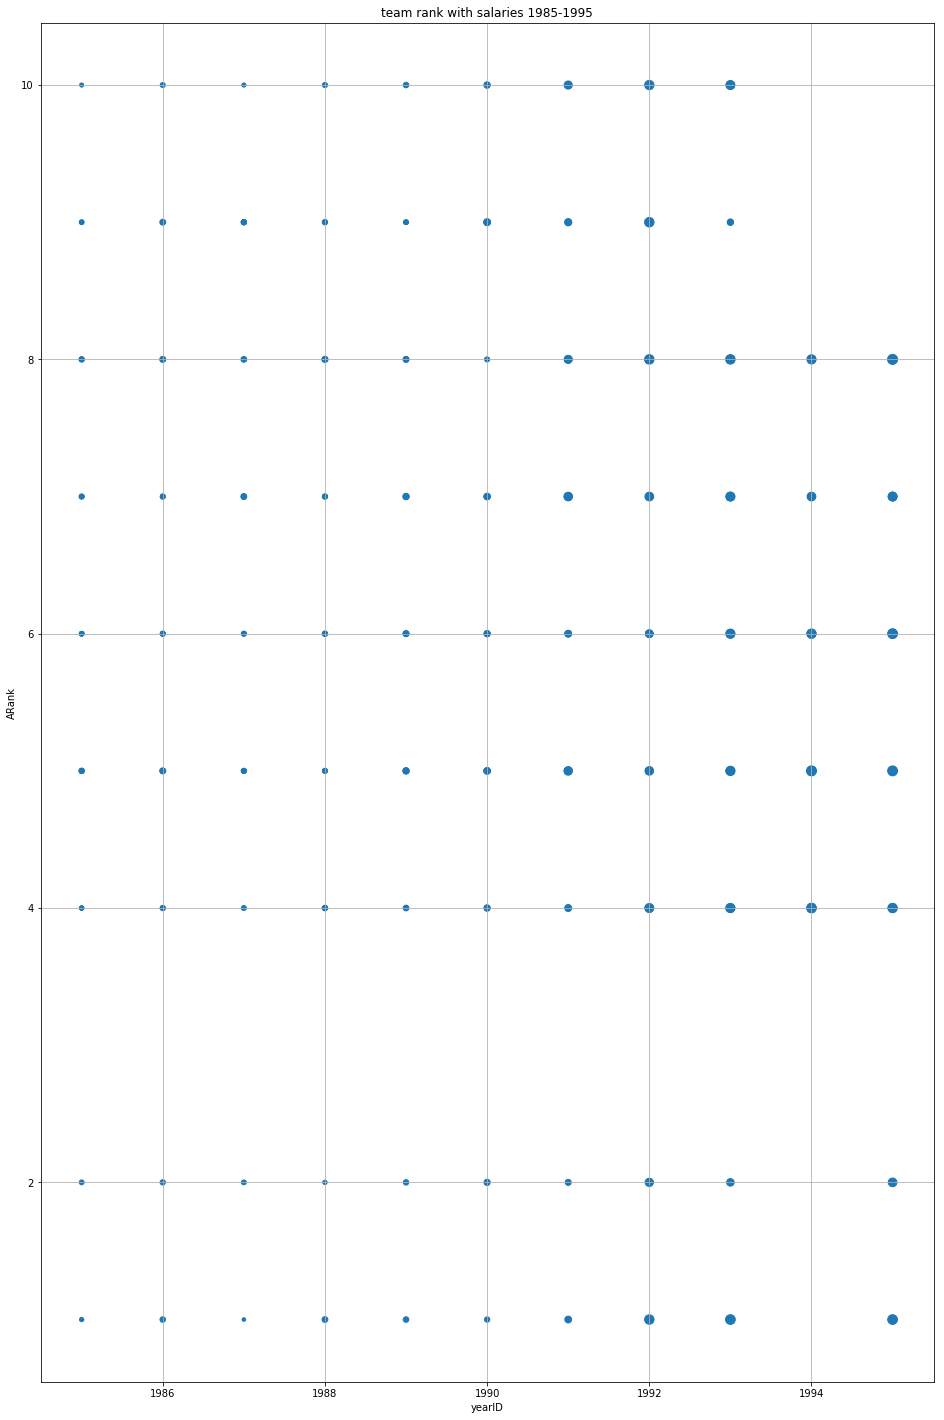

In [187]:
def draw_scatter_with_team_salaries(df, title):
    min_year, max_year = get_index_min_max(df, 'yearID')
    title = '%s %d-%d'%(title, min_year, max_year)
    salaries_df = df[['ARank','sum']].reset_index()
    salaries_df = salaries_df.rename({'sum':'salaries'}, axis='columns')
    
    salaries_df.plot.scatter(x='yearID', y='ARank', s=salaries_df.salaries/500000,
                             figsize=(16, 25), grid=True,
                             title=title)
    
for df in team_with_salaries_df_10years:
    draw_scatter_with_team_salaries(df, 'team rank with salaries')

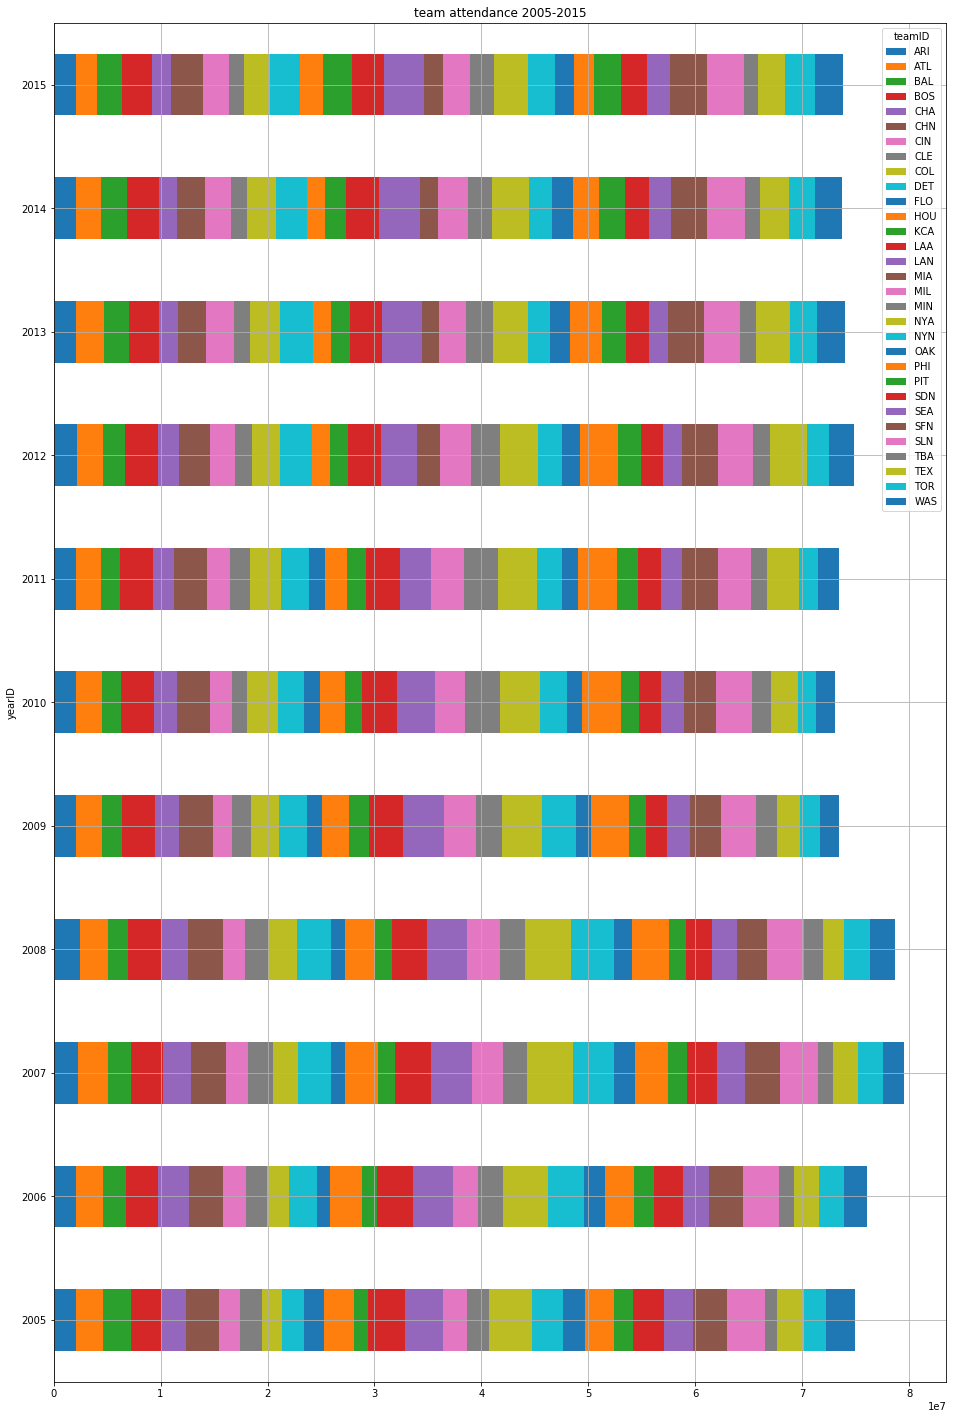

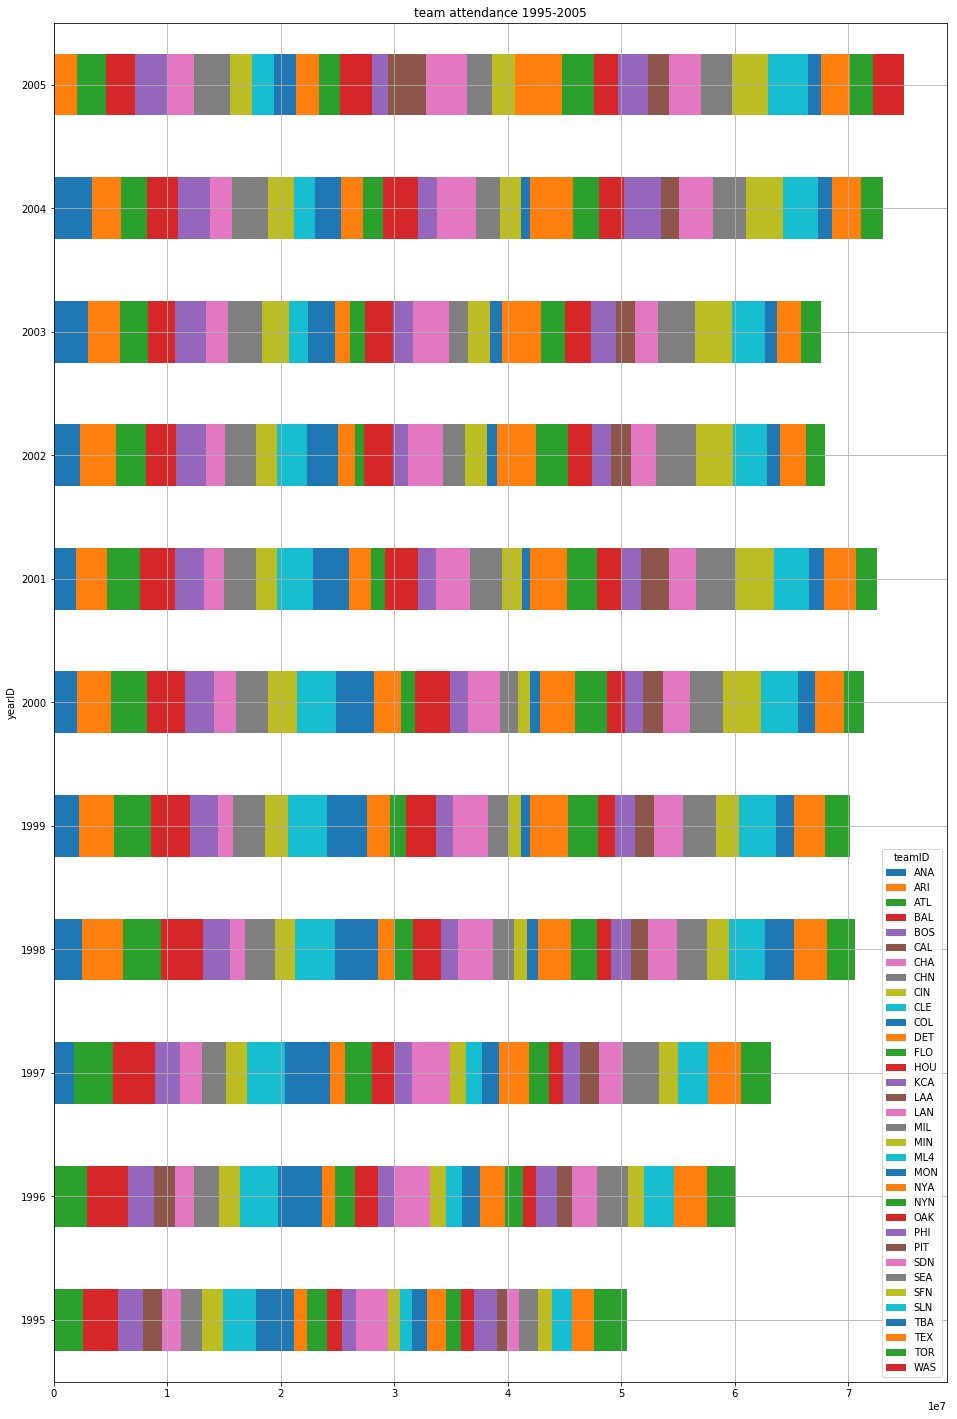

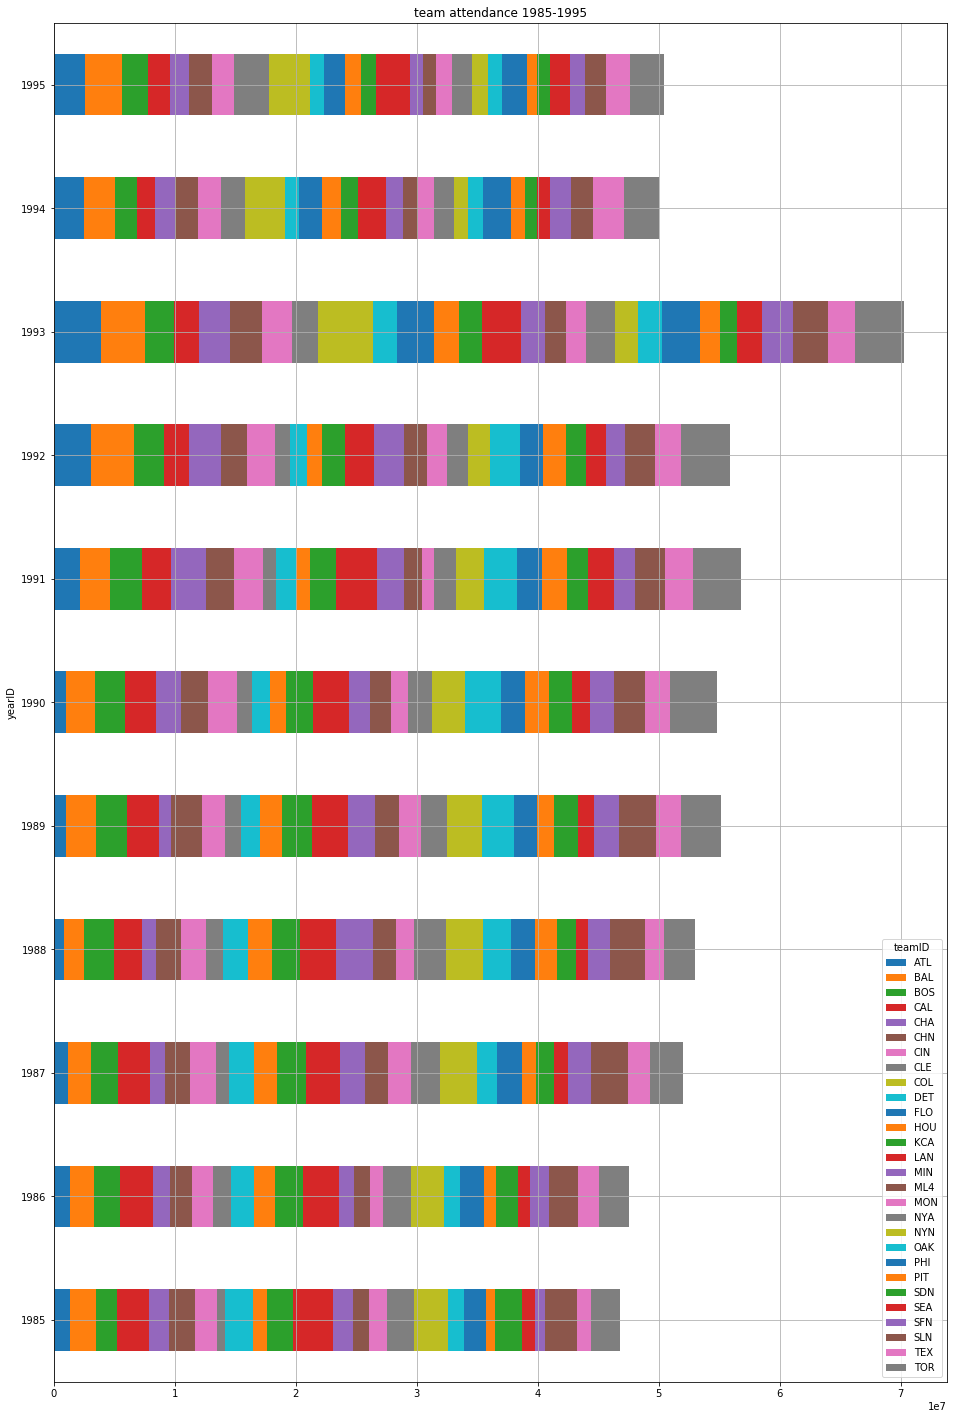

In [185]:
def draw_barh_with_team_attendance(df, title):
    min_year, max_year = get_index_min_max(df, 'yearID')
    title = '%s %d-%d'%(title, min_year, max_year)
    attendances_df = df[['attendance']].reset_index()
    draw_df = attendances_df.pivot(index='yearID', columns='teamID', values='attendance')
    draw_df.plot.barh(figsize=(16, 25), grid=True, stacked=True, title=title)
    
for df in team_with_salaries_df_10years:
    draw_barh_with_team_attendance(df, 'team attendance')

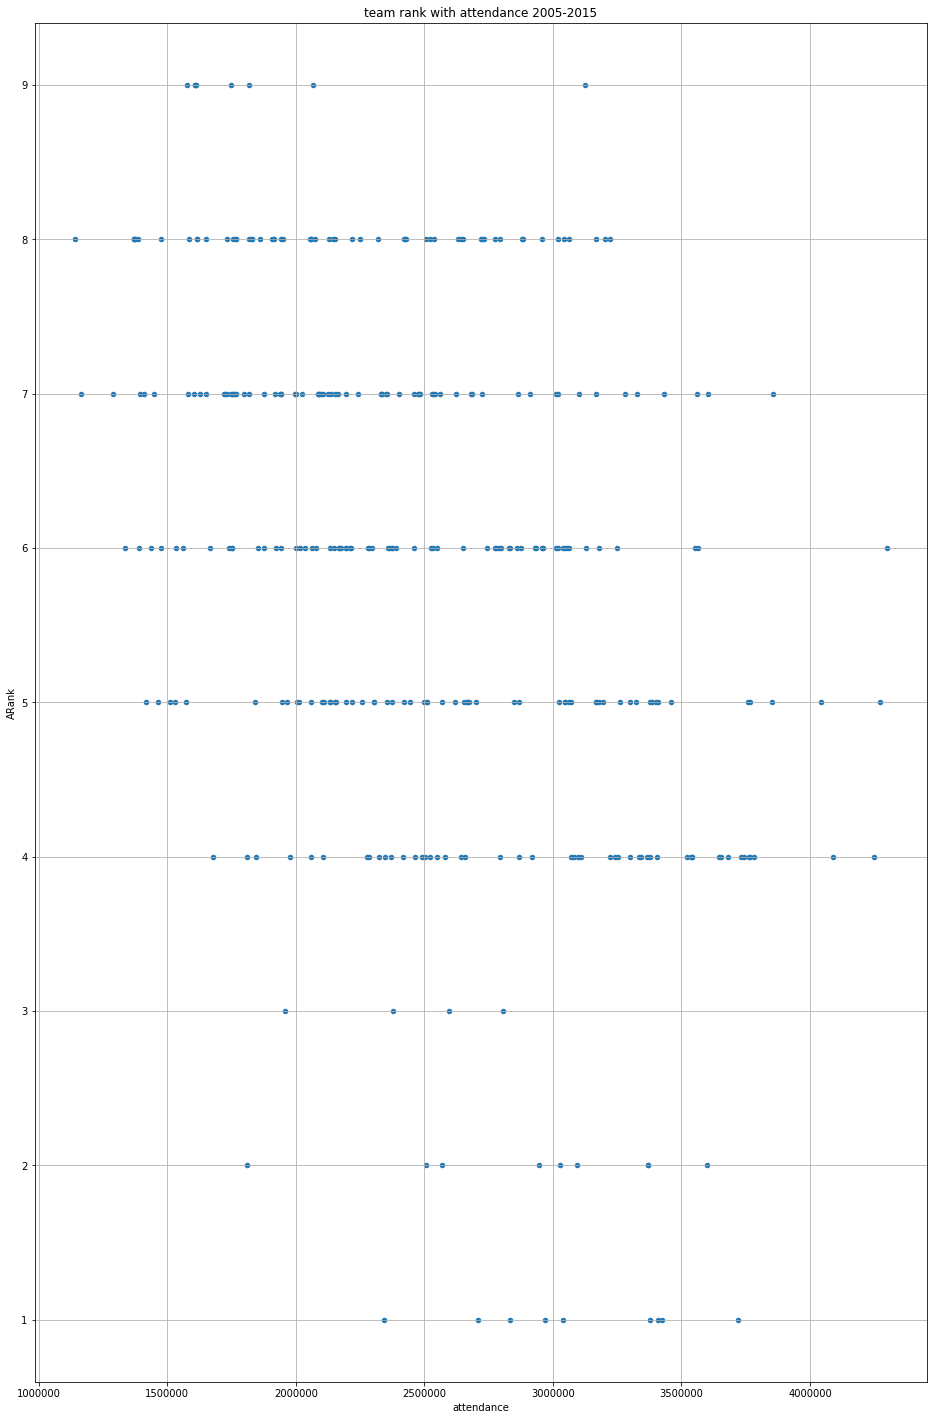

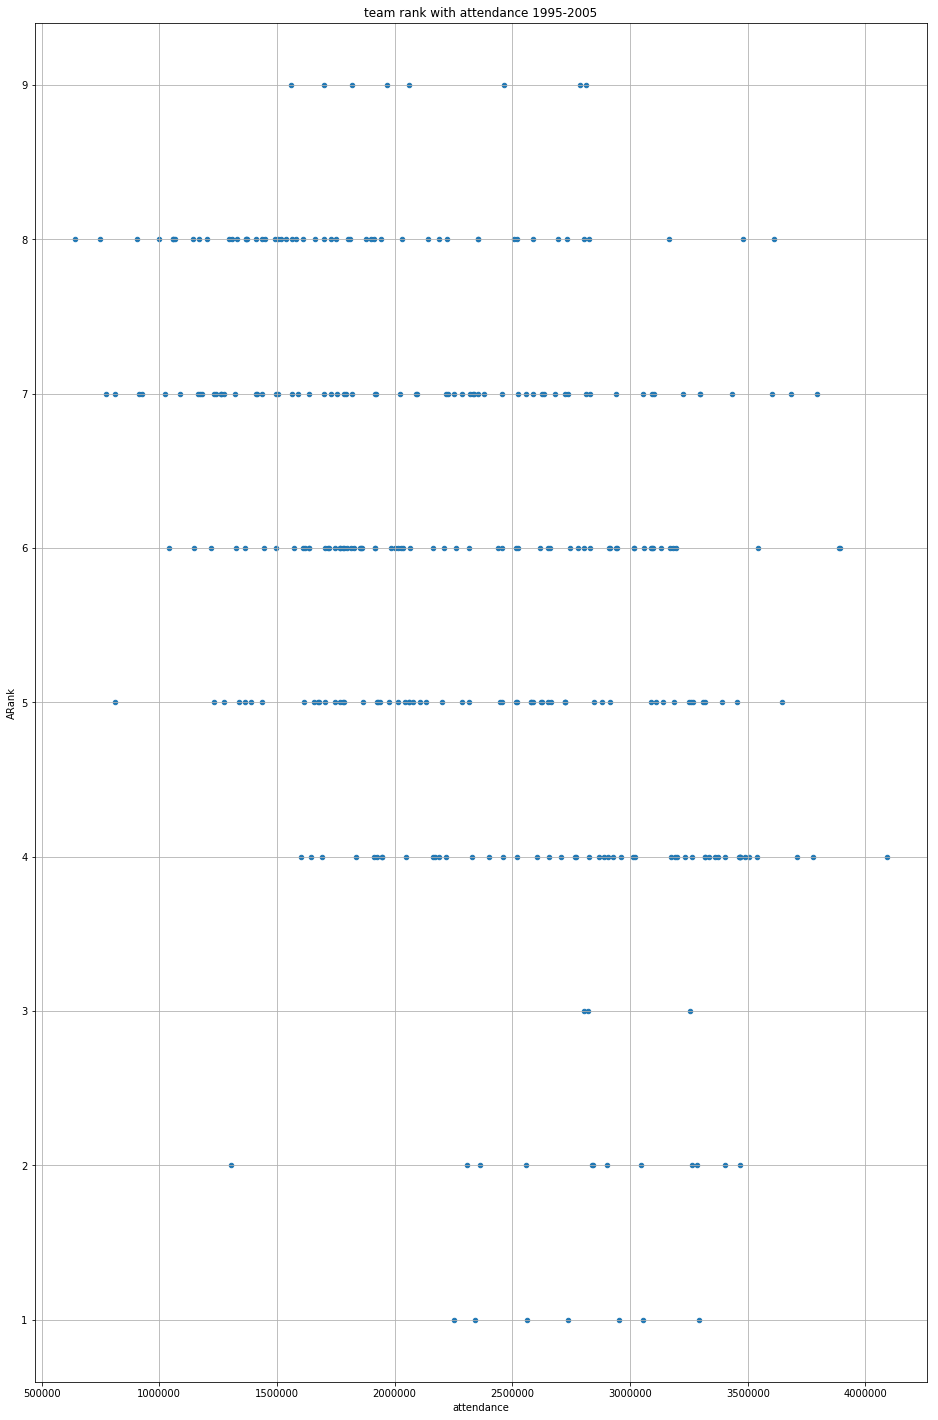

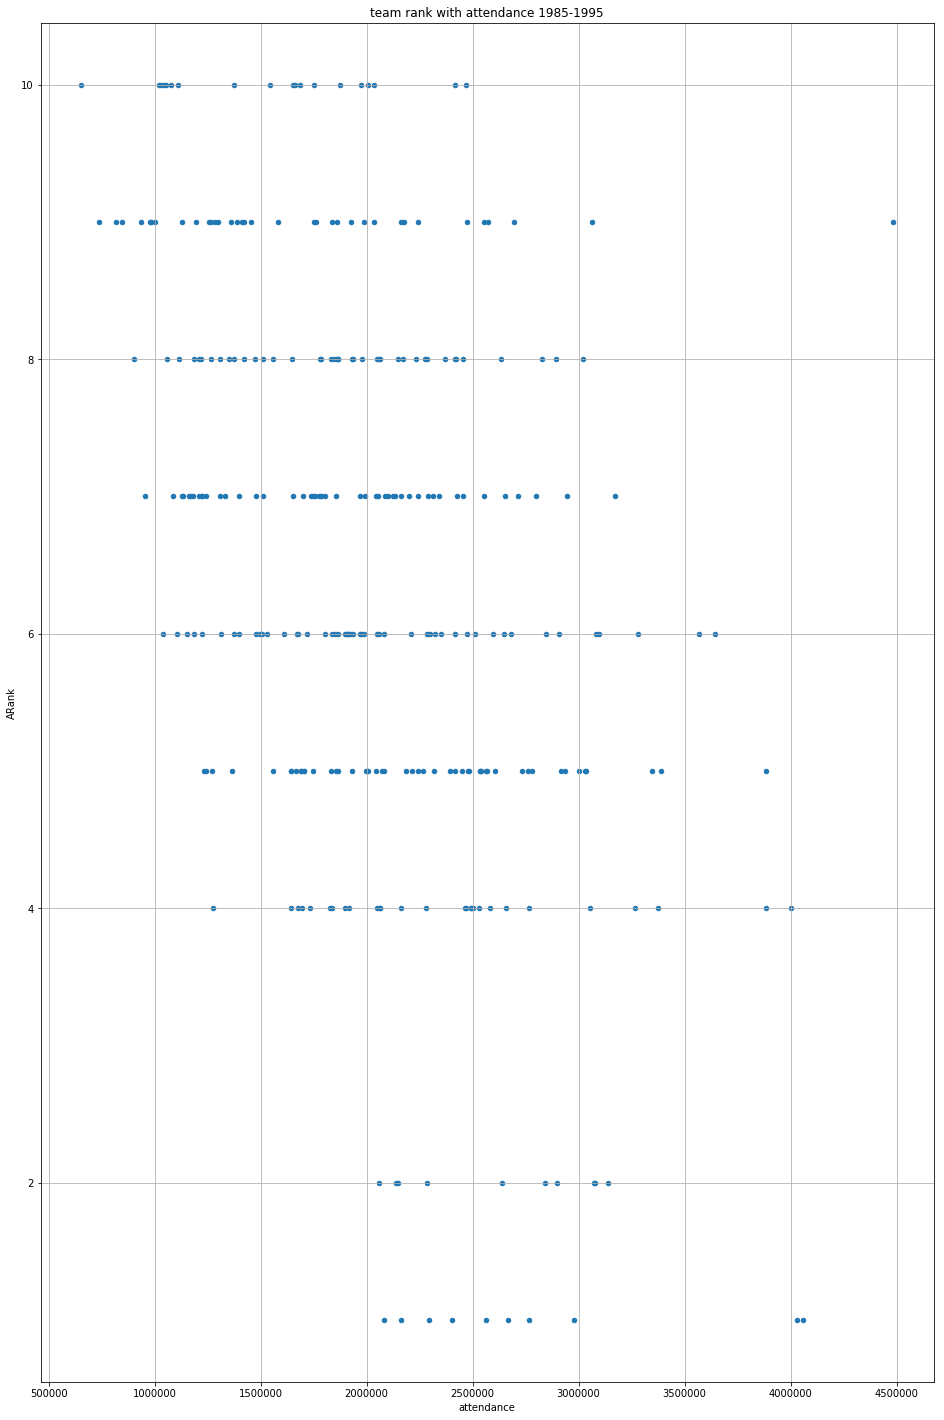

In [190]:
def draw_scatter_with_team_attendance(df, title):
    min_year, max_year = get_index_min_max(df, 'yearID')
    title = '%s %d-%d'%(title, min_year, max_year)
    salaries_df = df[['ARank','attendance']].reset_index()
    
    
    salaries_df.plot.scatter(x='attendance', y='ARank', 
                             figsize=(16, 25), grid=True,
                             title=title)
    
for df in team_with_salaries_df_10years:
    draw_scatter_with_team_attendance(df, 'team rank with attendance')

#### 计算球员数据的相关性

In [191]:
def add_player_birthyear(laries_df, player_df):
    return salaries_df.join(player_df[['birthYear']], on='playerID', how='inner', rsuffix='_p')
    
def calc_player_age_to_salaries_table(salaries_df):
    return salaries_df.apply(lambda row: row['yearID']-row['birthYear'], axis=1)

salaries_df = add_player_birthyear(salaries_df, pd.read_csv('./baseballdatabank-master/core/Master.csv').set_index('playerID'))
salaries_df['age'] = calc_player_age_to_salaries_table(salaries_df)



3314539.50336


In [138]:
salaries_df[['birthYear', 'age']] = salaries_df[['birthYear', 'age']].astype('int')
print salaries_df

       yearID teamID lgID   playerID   salary  birthYear  age
0        1985    ATL   NL  barkele01   870000       1955   30
552      1986    ATL   NL  barkele01   880000       1955   31
1291     1987    ATL   NL  barkele01   890000       1955   32
1613     1987    ML4   AL  barkele01    72500       1955   32
1917     1988    ATL   NL  barkele01   900000       1955   33
1        1985    ATL   NL  bedrost01   550000       1957   28
1071     1986    PHI   NL  bedrost01   650000       1957   29
1750     1987    PHI   NL  bedrost01  1050000       1957   30
2374     1988    PHI   NL  bedrost01   925000       1957   31
3069     1989    PHI   NL  bedrost01  1450000       1957   32
4026     1990    SFN   NL  bedrost01  1450000       1957   33
4485     1991    MIN   AL  bedrost01  1350000       1957   34
5611     1993    ATL   NL  bedrost01   500000       1957   36
6534     1994    ATL   NL  bedrost01   750000       1957   37
7418     1995    ATL   NL  bedrost01   750000       1957   38
2       

计算场均BATTING数据
* G              Games
* AB             At Bats
* R              Runs
* H              Hits
* 2B             Doubles
* 3B             Triples
* HR             Homeruns
* RBI            Runs Batted In
* SB             Stolen Bases
* CS             Caught Stealing
* BB             Base on Balls
* SO             Strikeouts
* IBB            Intentional walks
* HBP            Hit by pitch
* SH             Sacrifice hits
* SF             Sacrifice flies
* GIDP           Grounded into double plays


In [70]:
batting_df = pd.read_csv('./baseballdatabank-master/core/Batting.csv')
batting_df = batting_df[batting_df['yearID']>=START_YEAR]
#batting_df = batting_df.set_index(['playerID', 'yearID', 'teamID'])
print batting_df

         playerID  yearID  stint teamID lgID    G     AB     R      H    2B  \
62237    aasedo01    1985      1    BAL   AL   54    NaN   NaN    NaN   NaN   
62238   abregjo01    1985      1    CHN   NL    6    9.0   0.0    0.0   0.0   
62239   ackerji01    1985      1    TOR   AL   61    NaN   NaN    NaN   NaN   
62240   adamsri02    1985      1    SFN   NL   54  121.0  12.0   23.0   3.0   
62241   agostju01    1985      1    CHA   AL   54    0.0   0.0    0.0   0.0   
62242   aguaylu01    1985      1    PHI   NL   91  165.0  27.0   46.0   7.0   
62243   aguilri01    1985      1    NYN   NL   22   36.0   1.0   10.0   2.0   
62244   aikenwi01    1985      1    TOR   AL   12   20.0   2.0    4.0   1.0   
62245   alexado01    1985      1    TOR   AL   36    NaN   NaN    NaN   NaN   
62246   allenga01    1985      1    TOR   AL   14   34.0   2.0    4.0   1.0   
62247   allenne01    1985      1    SLN   NL   23    2.0   0.0    0.0   0.0   
62248   allenne01    1985      2    NYA   AL   17   

In [71]:

def gameavg_batting(row):
    result = {}
    games = row['G']
    if games == 0:
        games = 1
    result['gab_ab'] = row['AB']/games
    result['gab_h'] = row['H']/games
    result['gab_2b'] = row['2B']/games
    result['gab_3b'] = row['3B']/games
    result['gab_hr'] = row['HR']/games
    result['gab_rbi'] = row['RBI']/games
    result['gab_sb'] = row['SB']/games
    result['gab_cs'] = row['CS']/games
    result['gab_bb'] = row['3B']/games
    result['gab_so'] = row['SO']/games
    result['gab_ibb'] = row['IBB']/games
    result['gab_hbp'] = row['HBP']/games
    result['gab_sh'] = row['SH']/games
    result['gab_sf'] = row['SF']/games
    result['gab_gidp'] = row['GIDP']/games
    return pd.Series(result)
batting_df.merge(batting_df.apply(lambda row: gameavg_batting(row), axis=1),
                 left_index=True, right_index=True,
                 validate='1:1')
#batting_df[['result['gab_ab','gab_h','gab_2b','gab_3b','gab_hr','gab_rbi','gab_sb','gab_cs','gab_bb','gab_so','gab_ibb','gab_hbp','gab_sh','gab_sf','gab_gidp']]'] = batting_df.apply(lambda row: gameavg_batting(row), axis=1)
#print batting_df

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,gab_gidp,gab_h,gab_hbp,gab_hr,gab_ibb,gab_rbi,gab_sb,gab_sf,gab_sh,gab_so
62237,aasedo01,1985,1,BAL,AL,54,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62238,abregjo01,1985,1,CHN,NL,6,9.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.333333
62239,ackerji01,1985,1,TOR,AL,61,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62240,adamsri02,1985,1,SFN,NL,54,121.0,12.0,23.0,3.0,...,0.037037,0.425926,0.018519,0.037037,0.055556,0.185185,0.018519,0.000000,0.055556,0.425926
62241,agostju01,1985,1,CHA,AL,54,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62242,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,...,0.076923,0.505495,0.065934,0.065934,0.054945,0.230769,0.010989,0.032967,0.043956,0.285714
62243,aguilri01,1985,1,NYN,NL,22,36.0,1.0,10.0,2.0,...,0.045455,0.454545,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.318182,0.227273
62244,aikenwi01,1985,1,TOR,AL,12,20.0,2.0,4.0,1.0,...,0.083333,0.333333,0.000000,0.083333,0.000000,0.416667,0.000000,0.083333,0.000000,0.500000
62245,alexado01,1985,1,TOR,AL,36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62246,allenga01,1985,1,TOR,AL,14,34.0,2.0,4.0,1.0,...,0.071429,0.285714,0.000000,0.000000,0.000000,0.214286,0.000000,0.000000,0.000000,0.714286


计算场均投球数据
* W              Wins
* L              Losses
* G              Games
* GS             Games Started
* CG             Complete Games 
* SHO            Shutouts
* SV             Saves
* IPOuts         Outs Pitched (innings pitched x 3)
* H              Hits
* ER             Earned Runs
* HR             Homeruns
* BB             Walks
* SO             Strikeouts
* BAOpp          Opponent's Batting Average
* ERA            Earned Run Average
* IBB            Intentional Walks
* WP             Wild Pitches
* HBP            Batters Hit By Pitch
* BK             Balks
* BFP            Batters faced by Pitcher
* GF             Games Finished
* R              Runs Allowed
* SH             Sacrifices by opposing batters
* SF             Sacrifice flies by opposing batters
* GIDP           Grounded into double plays by opposing batter



In [59]:
pitching_df = pd.read_csv('./baseballdatabank-master/core/Pitching.csv')
pitching_df = pitching_df[pitching_df['yearID']>=START_YEAR]
print pitching_df

        playerID  yearID  stint teamID lgID   W   L   G  GS  CG  ...    IBB  \
24980   aasedo01    1985      1    BAL   AL  10   6  54   0   0  ...    7.0   
24981  abregjo01    1985      1    CHN   NL   1   1   6   5   0  ...    1.0   
24982  ackerji01    1985      1    TOR   AL   7   2  61   0   0  ...    1.0   
24983  agostju01    1985      1    CHA   AL   4   3  54   0   0  ...    1.0   
24984  aguilri01    1985      1    NYN   NL  10   7  21  19   2  ...    2.0   
24985  alexado01    1985      1    TOR   AL  17  10  36  36   6  ...    0.0   
24986  allenne01    1985      2    NYA   AL   1   0  17   0   0  ...    0.0   
24987  allenne01    1985      1    SLN   NL   1   4  23   1   0  ...    6.0   
24988  anderla02    1985      1    PHI   NL   3   3  57   0   0  ...    4.0   
24989  andujjo01    1985      1    SLN   NL  21  12  38  38  10  ...   12.0   
24990  armstmi01    1985      1    NYA   AL   0   0   9   0   0  ...    0.0   
24991  atherke01    1985      1    OAK   AL   4   7 

In [72]:

def gameavg_pitching(row):
    result = {}
    games = row['G']
    if games == 0:
        games = 1
    result['gap_wins'] = row['W']
    result['gap_losses'] = row['L']
    result['gap_games'] = games
    result['gap_started'] = row['GS']
    result['gap_completed'] = row['CG']
    result['gap_sho'] = row['SHO']/games
    result['gap_sv'] = row['SV']/games
    result['gap_ipouts'] = row['IPouts']/games
    result['gap_h'] = row['H']/games
    result['gap_hr'] = row['HR']/games
    result['gap_bb'] = row['BB']/games
    result['gap_so'] = row['SO']/games
    result['gap_baopp'] = row['BAOpp']/games
    result['gap_era'] = row['ERA']/games
    result['gap_ibb'] = row['IBB']/games
    result['gap_wp'] = row['WP']/games
    result['gap_hbp'] = row['HBP']/games
    result['gap_bk'] = row['BK']/games
    result['gap_bfp'] = row['BFP']/games
    result['gap_gf'] = row['GF']/games
    result['gap_r'] = row['R']/games
    result['gap_sh'] = row['SH']/games
    result['gap_sf'] = row['SF']/games
    result['gap_gidp'] = row['GIDP']/games
    return pd.Series(result)

pitching_df.merge(pitching_df.apply(lambda row: gameavg_pitching(row), axis=1),
                  left_index=True, right_index=True,
                  validate='1:1')

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,gap_losses,gap_r,gap_sf,gap_sh,gap_sho,gap_so,gap_started,gap_sv,gap_wins,gap_wp
24980,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,6.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,10.0,0.000000
24981,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,1.0,3.0,NaN,NaN,0.0,2.0,5.0,0.0,1.0,0.000000
24982,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,2.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,7.0,0.032787
24983,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,3.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,4.0,0.000000
24984,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,7.0,2.0,NaN,NaN,0.0,3.0,19.0,0.0,10.0,0.238095
24985,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,10.0,2.0,NaN,NaN,0.0,3.0,36.0,0.0,17.0,0.250000
24986,allenne01,1985,2,NYA,AL,1,0,17,0,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.117647
24987,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,4.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.043478
24988,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,3.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,3.0,0.017544
24989,andujjo01,1985,1,SLN,NL,21,12,38,38,10,...,12.0,2.0,NaN,NaN,0.0,2.0,38.0,0.0,21.0,0.052632


 读取 fielding 数据
 
 * Pos            Position
 * G              Games 
 * GS             Games Started
 * InnOuts        Time played in the field expressed as outs 
 * PO             Putouts
 * A              Assists
 * E              Errors
 * DP             Double Plays
 * PB             Passed Balls (by catchers)
 * WP             Wild Pitches (by catchers)
 * SB             Opponent Stolen Bases (by catchers)
 * CS             Opponents Caught Stealing (by catchers)
 * ZR             Zone Rating

In [73]:
fielding_df = pd.read_csv('./baseballdatabank-master/core/Fielding.csv')
fielding_df = fielding_df[fielding_df['yearID']>=START_YEAR]
print fielding_df

         playerID  yearID  stint teamID lgID POS    G    GS  InnOuts     PO  \
99035    aasedo01    1985      1    BAL   AL   P   54   0.0    264.0    8.0   
99036   abregjo01    1985      1    CHN   NL   P    6   5.0     72.0    1.0   
99037   ackerji01    1985      1    TOR   AL   P   61   0.0    259.0   10.0   
99038   adamsri02    1985      1    SFN   NL  2B    6   3.0     84.0    9.0   
99039   adamsri02    1985      1    SFN   NL  3B   16  10.0    337.0    2.0   
99040   adamsri02    1985      1    SFN   NL  SS   25  19.0    476.0   24.0   
99041   agostju01    1985      1    CHA   AL   P   54   0.0    181.0   10.0   
99042   aguaylu01    1985      1    PHI   NL  2B   17   3.0    192.0   27.0   
99043   aguaylu01    1985      1    PHI   NL  3B    7   3.0    126.0    4.0   
99044   aguaylu01    1985      1    PHI   NL  SS   60  36.0   1052.0   61.0   
99045   aguilri01    1985      1    NYN   NL   P   21  19.0    367.0    8.0   
99046   aikenwi01    1985      1    TOR   AL  DH   1

In [75]:
def gameavg_fielding(row):
    result = {}
    games = row['G']
    if games == 0:
        games = 1
    result['gap_pos'] = row['POS']
    result['gap_games'] = games
    result['gap_started'] = row['GS']
    result['gap_innouts'] = row['InnOuts']/games
    result['gap_po'] = row['PO']/games
    result['gap_a'] = row['A']/games
    result['gap_e'] = row['E']/games
    result['gap_dp'] = row['DP']/games
    result['gap_pb'] = row['PB']/games
    result['gap_wp'] = row['WP']/games
    result['gap_sb'] = row['SB']/games
    result['gap_cs'] = row['CS']/games
    result['gap_zr'] = row['ZR']/games
    return pd.Series(result)

fielding_df.merge(fielding_df.apply(lambda row: gameavg_fielding(row), axis=1),
                  left_index=True, right_index=True,
                  validate='1:1')

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,...,gap_e,gap_games,gap_innouts,gap_pb,gap_po,gap_pos,gap_sb,gap_started,gap_wp,gap_zr
99035,aasedo01,1985,1,BAL,AL,P,54,0.0,264.0,8.0,...,0.000000,54,4.888889,NaN,0.148148,P,NaN,0.0,NaN,NaN
99036,abregjo01,1985,1,CHN,NL,P,6,5.0,72.0,1.0,...,0.166667,6,12.000000,NaN,0.166667,P,NaN,5.0,NaN,NaN
99037,ackerji01,1985,1,TOR,AL,P,61,0.0,259.0,10.0,...,0.000000,61,4.245902,NaN,0.163934,P,NaN,0.0,NaN,NaN
99038,adamsri02,1985,1,SFN,NL,2B,6,3.0,84.0,9.0,...,0.166667,6,14.000000,NaN,1.500000,2B,NaN,3.0,NaN,NaN
99039,adamsri02,1985,1,SFN,NL,3B,16,10.0,337.0,2.0,...,0.062500,16,21.062500,NaN,0.125000,3B,NaN,10.0,NaN,NaN
99040,adamsri02,1985,1,SFN,NL,SS,25,19.0,476.0,24.0,...,0.120000,25,19.040000,NaN,0.960000,SS,NaN,19.0,NaN,NaN
99041,agostju01,1985,1,CHA,AL,P,54,0.0,181.0,10.0,...,0.018519,54,3.351852,NaN,0.185185,P,NaN,0.0,NaN,NaN
99042,aguaylu01,1985,1,PHI,NL,2B,17,3.0,192.0,27.0,...,0.058824,17,11.294118,NaN,1.588235,2B,NaN,3.0,NaN,NaN
99043,aguaylu01,1985,1,PHI,NL,3B,7,3.0,126.0,4.0,...,0.000000,7,18.000000,NaN,0.571429,3B,NaN,3.0,NaN,NaN
99044,aguaylu01,1985,1,PHI,NL,SS,60,36.0,1052.0,61.0,...,0.133333,60,17.533333,NaN,1.016667,SS,NaN,36.0,NaN,NaN


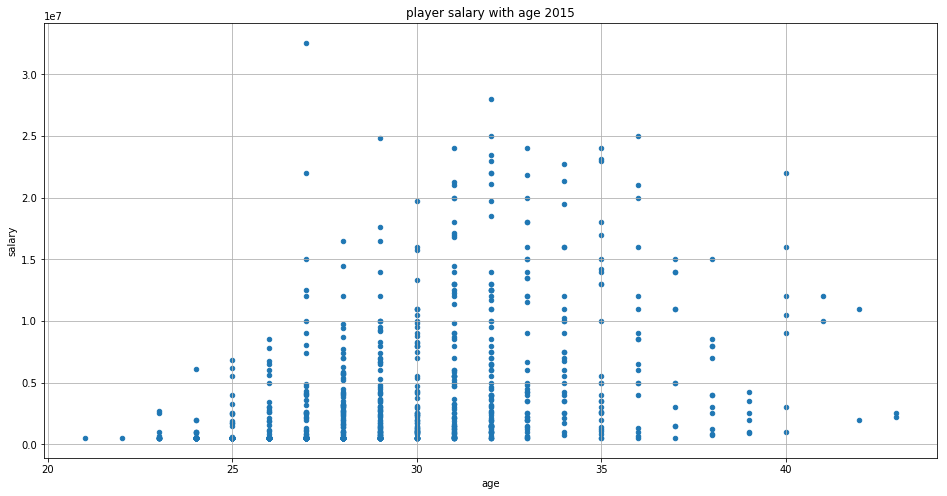

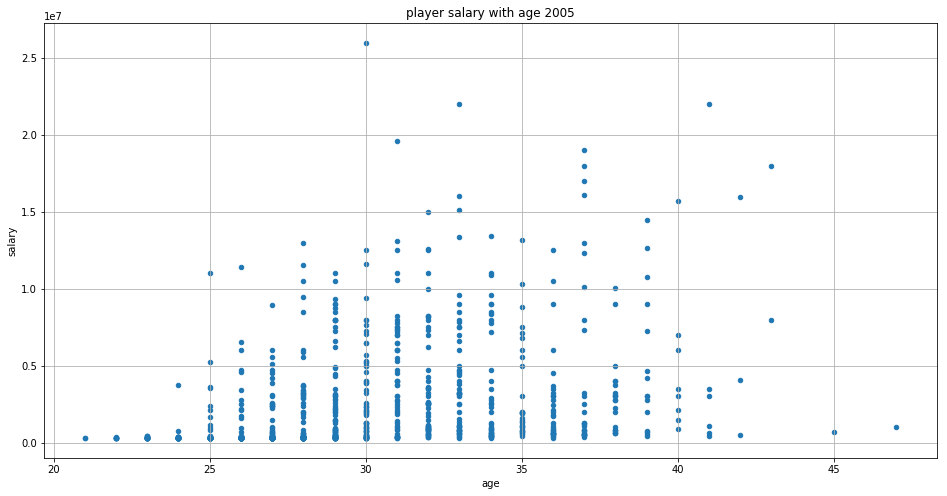

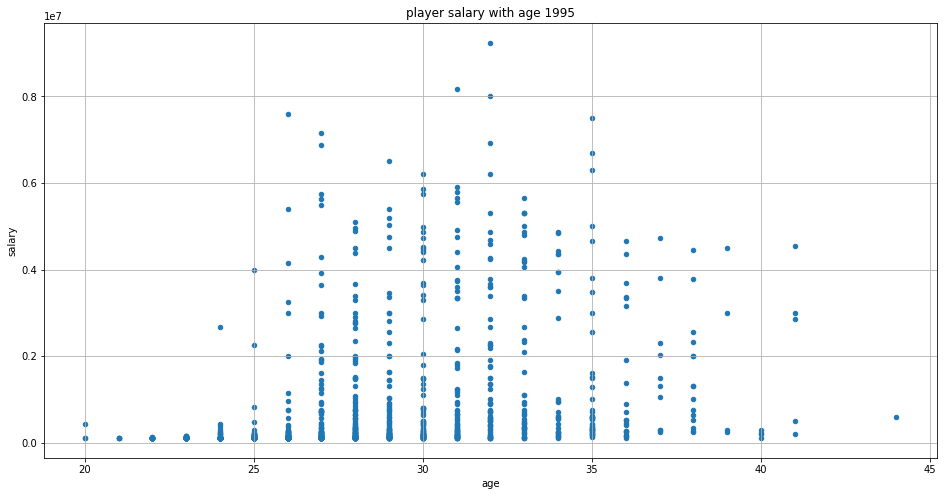

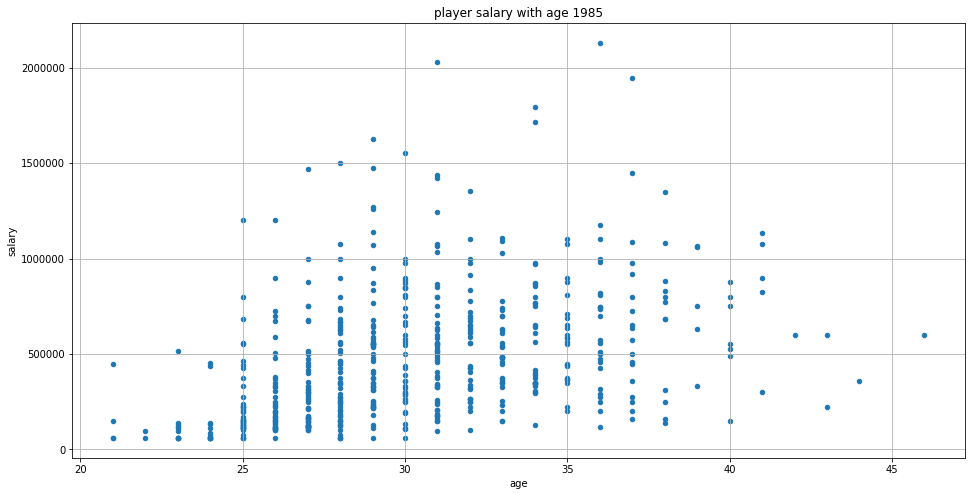

In [209]:
year_salaries_df = salaries_df.set_index('yearID')
def draw_age_sal_plot(df, yearID):
    year_df = df.loc[yearID][['age', 'salary']]    
    title = 'player salary with age ' + str(yearID)
    year_df.plot.scatter(x='age', y='salary', 
                             figsize=(16, 8), grid=True,
                        title = title)

draw_age_sal_plot(year_salaries_df, 2015)
draw_age_sal_plot(year_salaries_df, 2005)
draw_age_sal_plot(year_salaries_df, 1995)
draw_age_sal_plot(year_salaries_df, 1985)

Appearances table:

`G_all` int(11) DEFAULT NULL,
  `GS` varchar(255) DEFAULT NULL,
  `G_batting` int(11) DEFAULT NULL,
  `G_defense` int(11) DEFAULT NULL,
  `G_p` int(11) DEFAULT NULL,
  `G_c` int(11) DEFAULT NULL,
  `G_1b` int(11) DEFAULT NULL,
  `G_2b` int(11) DEFAULT NULL,
  `G_3b` int(11) DEFAULT NULL,
  `G_ss` int(11) DEFAULT NULL,
  `G_lf` int(11) DEFAULT NULL,
  `G_cf` int(11) DEFAULT NULL,
  `G_rf` int(11) DEFAULT NULL,
  `G_of` int(11) DEFAULT NULL,
  `G_dh` varchar(255) DEFAULT NULL,
  `G_ph` varchar(255) DEFAULT NULL,
  `G_pr` varchar(255) DEFAULT NULL


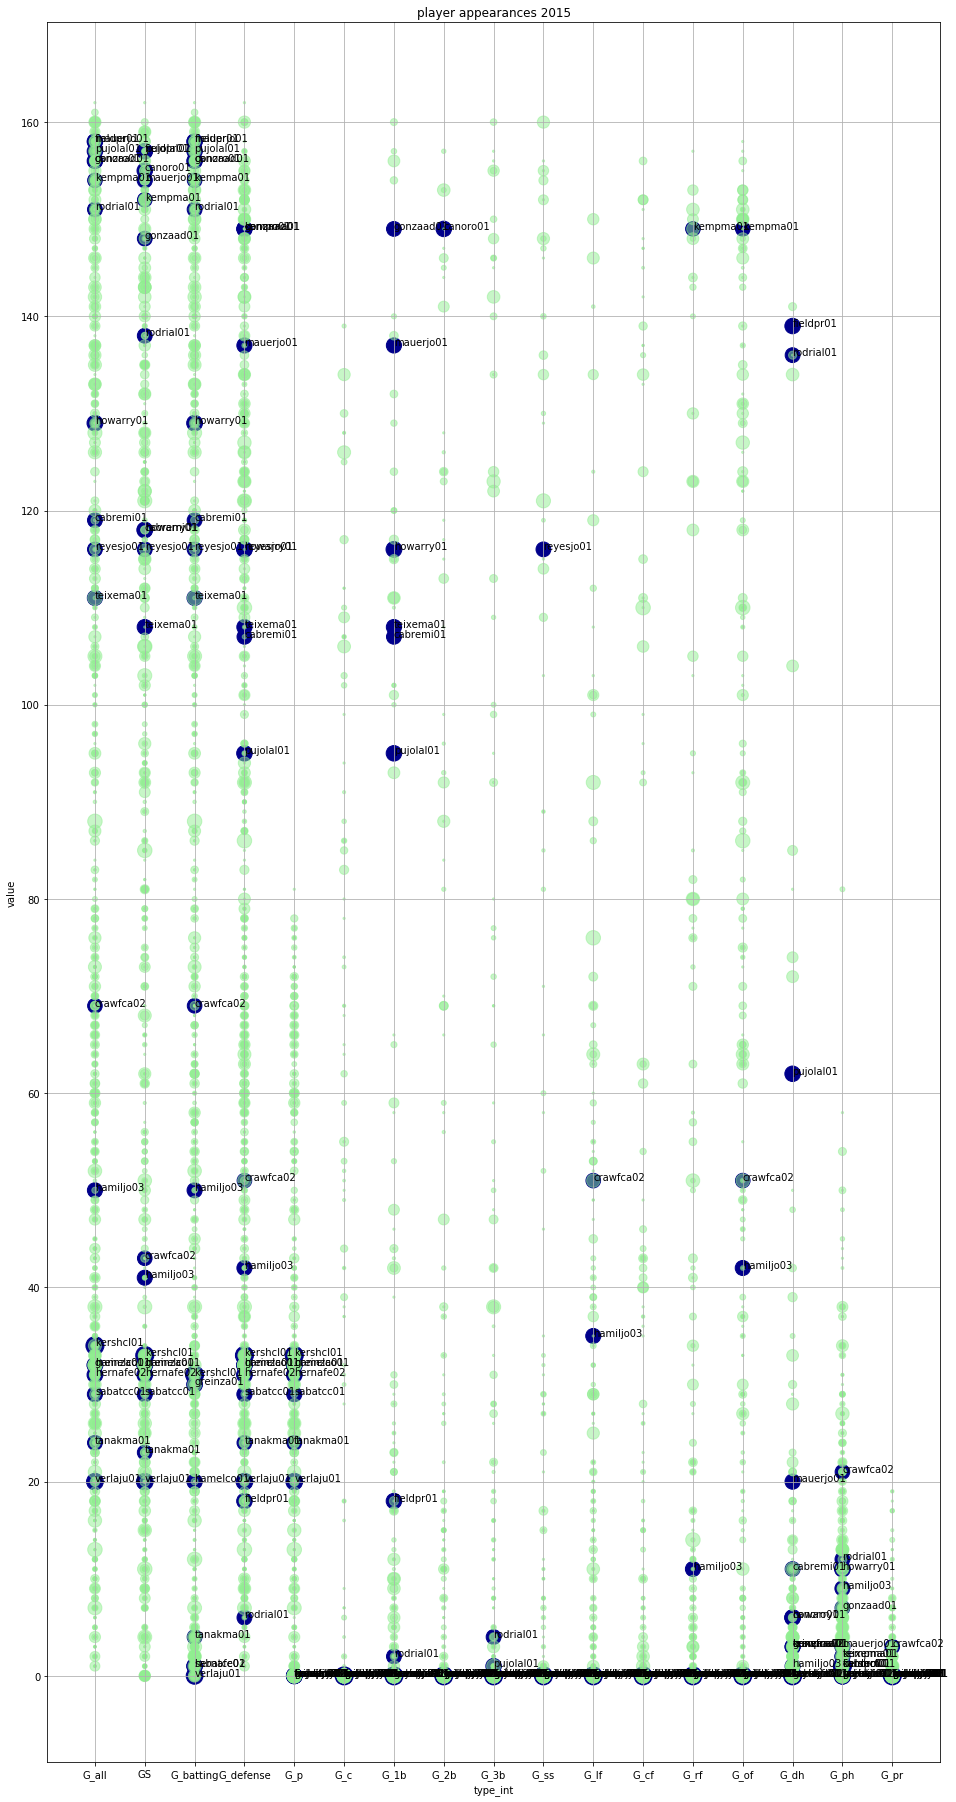

In [279]:
appearances_df = pd.read_csv('./baseballdatabank-master/core/Appearances.csv').set_index(['yearID'])
def draw_appearances_sal_plot(appear_df, year_salaries_df, yearID):
    df = appear_df.loc[yearID].groupby('playerID').sum()
    draw_df = df.stack()
    draw_df = draw_df.reset_index().rename(columns={'level_1':'type', 0:'value'}).set_index('playerID')
    type_defines = ['G_all', 'GS', 'G_batting', 'G_defense', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 
                        'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'G_ph', 'G_pr']
    def convert_type_to_int(row):
        result = {}
        
        result['type_int'] = type_defines.index(row['type'])
        return pd.Series(result)
    draw_df['type_int'] = draw_df.apply(lambda row: convert_type_to_int(row), axis=1)
    salaries_df = year_salaries_df.loc[yearID].set_index('playerID')[['salary']]
    top = 20
    top_salaries_df = salaries_df.nlargest(top, 'salary')
    other_salaries_df = salaries_df.nsmallest(len(salaries_df.index)-top, 'salary')
    draw_df_1 = draw_df.join(top_salaries_df, how='right').reset_index()
    ax1 = draw_df_1.plot.scatter(x='type_int', y='value', s=draw_df_1.salary/100000,
                   figsize=(16, 32), grid=True, color='DarkBlue',
                   title = 'player appearances '+str(yearID))
    for i, row in draw_df_1.iterrows():
        ax1.text(row['type_int'], row['value'], row['playerID'])
    #ax1.set_xticks(range(0, len(type_defines)))
    #ax1.set_xticklabels(type_defines)
    draw_df_2 = draw_df.join(other_salaries_df, how='right').reset_index()
    ax2 = draw_df_2.plot.scatter(x='type_int', y='value', s=draw_df_2.salary/100000, ax=ax1,
                   figsize=(16, 32), grid=True, alpha=0.5, color='LightGreen',
                   title = 'player appearances '+str(yearID))
    ax2.set_xticks(range(0, len(type_defines)))
    ax2.set_xticklabels(type_defines)

    
    #df.plot.scatter(x='')
    #top_salaries_df = df.loc[yearID].nlargest(10, 'salary')
    #print top_salaries_df
    #title = 'player salary with age ' + str(yearID)
    #year_df.plot.scatter(x='age', y='salary', 
    #                         figsize=(16, 8), grid=True,
    #                    title = title)
    
draw_appearances_sal_plot(appearances_df, year_salaries_df, 2015)